In [1]:
# 使下面的代码支持python2和python3
from __future__ import division, print_function, unicode_literals

# 查看python的版本是否为3.5及以上
import sys
assert sys.version_info >= (3, 5)

# 查看sklearn的版本是否为0.20及以上
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os 

# 在每一次的运行后获得的结果与这个notebook的结果相同
np.random.seed(42) 

# 让matplotlib的图效果更好
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 设置保存图片的途径
PROJECT_ROOT_DIR = "."
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    '''
    运行即可保存自动图片
    
    :param fig_id: 图片名称
    :param tight_layout: 为真，则在画布上自动进行坐标轴调整
    '''
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
# 忽略掉没用的警告
import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning, module='sklearn',  lineno=196)

In [4]:
df = pd.read_excel("dataset.xlsx", engine="openpyxl")

In [5]:
# 不含真实分类信息的数据集
X = df.drop("TRUE VALUE", axis=1)
# 真实分类信息的列
labels = df["TRUE VALUE"]
X

,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %)
0,47.604,2.858,5.749,0.062,7.024,0.087,12.625,22.916,0.328,0.207900,0.061750
1,51.788,1.166,2.557,0.475,6.801,0.145,14.762,21.743,0.327,0.080071,0.014881
2,46.561,3.109,6.139,0.145,6.914,0.037,12.478,23.112,0.620,0.238984,0.023204
3,46.344,3.170,7.776,0.014,6.842,0.068,11.688,23.067,0.574,0.258931,0.049703
4,50.180,1.965,3.294,0.106,5.729,0.063,13.603,23.626,0.540,0.121500,0.019333
...,...,...,...,...,...,...,...,...,...,...,...
2267,51.500,0.570,2.140,0.110,10.340,0.300,15.790,18.890,0.300,0.077630,0.009200
2268,51.850,0.550,1.920,0.070,10.500,0.310,15.620,18.930,0.260,0.066087,0.014500
2269,52.100,0.420,2.380,0.140,8.180,0.200,16.040,20.360,0.180,0.071724,0.015300
2270,52.230,0.350,2.020,0.170,7.700,0.210,16.230,20.890,0.190,0.067172,0.010100


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SiO2 (wt. %)   2272 non-null   float64
 1   TiO2 (wt. %)   2272 non-null   float64
 2   Al2O3 (wt. %)  2272 non-null   float64
 3   Cr2O3 (wt. %)  2272 non-null   float64
 4   FeO (wt. %)    2272 non-null   float64
 5   MnO (wt. %)    2272 non-null   float64
 6   MgO (wt. %)    2272 non-null   float64
 7   CaO (wt. %)    2272 non-null   float64
 8   Na2O  (wt. %)  2272 non-null   float64
 9   IV (Al)        2272 non-null   float64
 10  H2O (wt. %)    2272 non-null   float64
dtypes: float64(11)
memory usage: 195.4 KB


In [7]:
# 原数据集的真实分类信息
tag = list(np.unique(labels))
tag

[-1, 0, 1]

In [8]:
from sklearn.preprocessing import StandardScaler

# 降维前先需要对数据进行标准化处理
scaler = StandardScaler()
X_processed = pd.DataFrame(scaler.fit_transform(X))

# 普通PCA（线性投影）

In [9]:
from sklearn.decomposition import PCA

# PCA假定以原点为中心，会自动将数据集中心化处理
pca1 = PCA(n_components=2)
# 将数据降至2维
X_reduced1 = pca1.fit_transform(X_processed)
X_reduced1.shape

(2272, 2)

In [10]:
# 主成分的权重系数，可获得主成分在特征空间的表达式
pca1.components_

array([[-0.42113472,  0.41548467,  0.36557801, -0.15419825,  0.06432417,
        -0.12771227, -0.40822211,  0.24756898,  0.24712526,  0.41062427,
         0.12052699],
       [-0.03741971, -0.00905855,  0.04400909, -0.30989707,  0.64611524,
         0.52494983, -0.11020771, -0.3804949 ,  0.11273722, -0.01373595,
        -0.19413145]])

In [11]:
# 查看主成分轴上的数据集方差的比例（方差解释率）
pca1.explained_variance_ratio_

array([0.45075653, 0.18692661])

In [12]:
# 丢失的方差解释率
1 - pca1.explained_variance_ratio_.sum()

0.36231686654138584

In [13]:
# 数据集在主成分定义的超平面上的投影，2272 x 2
X_reduced1

array([[ 3.9380202 , -0.4596334 ],
       [-1.49280185,  0.05266333],
       [ 5.06457565, -0.44515568],
       ...,
       [-2.88009113,  1.95107869],
       [-3.12958423,  1.61244563],
       [-3.75394313,  2.89601684]])

Saving figure 2D_PCA


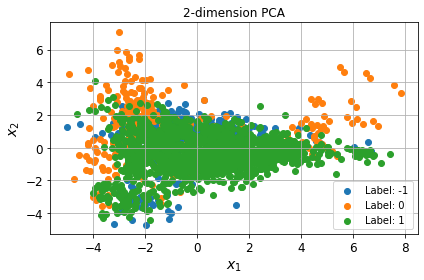

In [14]:
import matplotlib.pyplot as plt

plt.figure(1)

legend = []
# 绘制使用普通PCA降至二维平面的数据点投图
for i, label in enumerate(tag):
    plt.scatter(X_reduced1[:, 0][labels==label], X_reduced1[:, 1][labels==label])
    legend.append("Label: {}".format(label))
plt.legend(legend)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("2-dimension PCA")
plt.grid()
save_fig("2D_PCA")

In [15]:
# 恢复原数据集，即重构数据
X_recovered = pca1.inverse_transform(X_reduced1)

In [16]:
X_recovered.shape

(2272, 11)

In [17]:
# 比较原数据集和经过降维后再恢复的数据集，False表明两者不完全一样，即恢复的原数据集有数据丢失
np.allclose(X_recovered, X_processed)

False

In [18]:
from sklearn.metrics import mean_squared_error

# 重构数据与原始数据的平方距离
mean_squared_error(X_recovered, X_processed)

0.36231686654138556

In [19]:
# 不设置要降到的维度数量，即找到特征空间中存在的所有主成分轴
pca2 = PCA()
pca2.fit(X_processed)
# 各主成分轴上的方差解释率
pca2.explained_variance_ratio_

array([4.50756528e-01, 1.86926605e-01, 1.25096888e-01, 9.18287741e-02,
       5.77389814e-02, 4.20165705e-02, 2.37266449e-02, 1.23718980e-02,
       6.90309149e-03, 2.62719666e-03, 6.82109354e-06])

In [20]:
cumsum = np.cumsum(pca2.explained_variance_ratio_)
# 计算方差解释率保留95%时，所需的最小维数
d = np.argmax(cumsum>=0.95) + 1
d

6

Saving figure explained_variance_plot


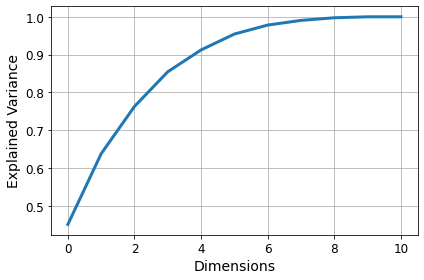

In [21]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

# 随机PCA

In [22]:
# 快速地找到前d个主成分的近似值，svd_solver的默认值是"auto"
rnd_pca = PCA(n_components=2, svd_solver="randomized")
X_reduced2 = rnd_pca.fit_transform(X_processed)

# 增量PCA

In [23]:
from sklearn.decomposition import IncrementalPCA

# 针对大型训练集使用，可以将数据分批进行IPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=2)
for X_batch in np.array_split(X_processed, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced3 = inc_pca.transform(X_processed)

In [24]:
# 比较用于pca和inc_pca的训练集在各个维度的平均值是否相等
np.allclose(pca1.mean_, inc_pca.mean_)

True

In [25]:
# 比较pca和inc_pca降维后的数据是否一样
np.allclose(X_reduced1, X_reduced3)

False

In [26]:
# 测试增量PCA降维所需时间
%timeit IncrementalPCA(n_components=5, batch_size=100).fit(X_processed)

9.97 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
# 测试普通PCA降维所需时间
%timeit PCA(n_components=5).fit(X_processed)

3.68 ms ± 48.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
# 测试随机PCA降维所需时间
%timeit PCA(n_components=5, svd_solver="randomized", random_state=42)

2.21 µs ± 11.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 核PCA（非线性投影）

In [31]:
from sklearn.decomposition import KernelPCA

# 调用核为rbf的PCA进行非线性投影
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced4 = rbf_pca.fit_transform(X_processed)

In [32]:
# 降至二维的数据集
X_reduced4

array([[ 0.58757136,  0.16569638],
       [-0.35782739, -0.05839641],
       [ 0.66270486,  0.13528767],
       ...,
       [-0.48576459, -0.20791339],
       [-0.50659185, -0.15046424],
       [-0.44787899, -0.16387586]])

Saving figure kernel_pca_plot


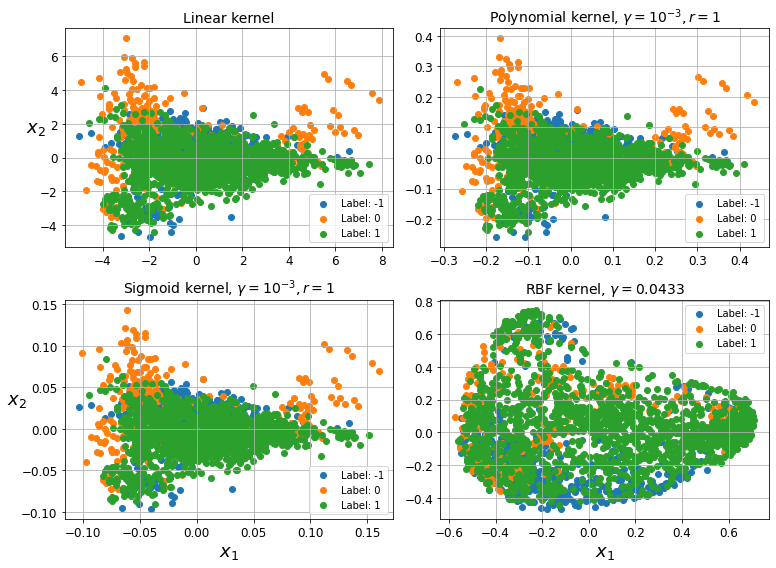

In [33]:
import matplotlib.pyplot as plt

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
poly_pca = KernelPCA(n_components=2, kernel="poly", gamma=0.001, coef0=1, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

model = [(221, lin_pca, "Linear kernel"), 
         (222, poly_pca, "Polynomial kernel, $\gamma=10^{-3}, r=1$"),
         (223, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$"), 
         (224, rbf_pca, "RBF kernel, $\gamma=0.0433$")]

def plot_2D_reduced(model, X, labels, tag, fig_name=True):
    """
    绘制使用降维手段将数据点进行二维投图
    
    :param model: 降维算法
    :param X: 只含特征值的数据集
    :param labels: 只含标签值的数据集
    :param tag: 真实的分类标签类型
    :param fig_name: 图片名称
    """
    
    plt.figure(figsize=(11, 8))
    legend = []
    for subplot, pca, title in model:
        X_reduced = pca.fit_transform(X)
        plt.subplot(subplot)
        plt.title(title, fontsize=14)
        for i, label in enumerate(tag):
            plt.scatter(X_reduced[:, 0][labels==label], X_reduced[:, 1][labels==label])
            legend.append("Label: {}".format(label))
        if subplot == 221 or subplot == 223:
            plt.ylabel("$x_2$", fontsize=18, rotation=0)
        if subplot == 223 or subplot == 224:
            plt.xlabel("$x_1$", fontsize=18)
        plt.grid(True)
        plt.legend(legend)
    save_fig(fig_name)
    plt.show()

plot_2D_reduced(model, X_processed, labels, tag, fig_name="kernel_pca_plot")

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# pipeline先进行降维，后进行分类（可改成回归模型）
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="liblinear", multi_class="auto")),
    ])

# 核PCA的参数
param_grid = {
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid", "linear", "poly"],
        "kpca__coef0": np.linspace(0, 1, 10)
    }

# 自动查找最优参数，评分为分类的准确性
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)
grid_search.fit(X_processed, labels)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   32.5s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'kpca__coef0': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                         'kpca__kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
             scoring='accuracy', verbose=1)

In [35]:
# 最优的模型
grid_search.best_estimator_

Pipeline(steps=[('kpca',
                 KernelPCA(coef0=0.4444444444444444, gamma=0.04555555555555556,
                           kernel='poly', n_components=2)),
                ('log_reg', LogisticRegression(solver='liblinear'))])

In [36]:
# 最优的模型参数
grid_search.best_params_

{'kpca__coef0': 0.4444444444444444,
 'kpca__gamma': 0.04555555555555556,
 'kpca__kernel': 'poly'}

In [37]:
# 最优的模型评分
grid_search.best_score_

0.682210247598201

In [38]:
# 使用最优的模型进行降维
lin_pca_new = KernelPCA(n_components=2, kernel="linear", gamma=0.03, coef0=0, fit_inverse_transform=True)
X_reduced_new = lin_pca_new.fit_transform(X_processed)
# 重建的前图像数据，只有fit_inverse_transform=True，才能使用inverse_transform方法
X_preimage = lin_pca_new.inverse_transform(X_reduced_new)

In [39]:
X_preimage.shape

(2272, 11)

In [40]:
from sklearn.metrics import mean_squared_error

# 重建前图像的数据与原始数据的平方距离
mean_squared_error(X_processed, X_preimage)

8.14462664779127e-26

# 流形学习（非线性降维）

Saving figure manifold_plot


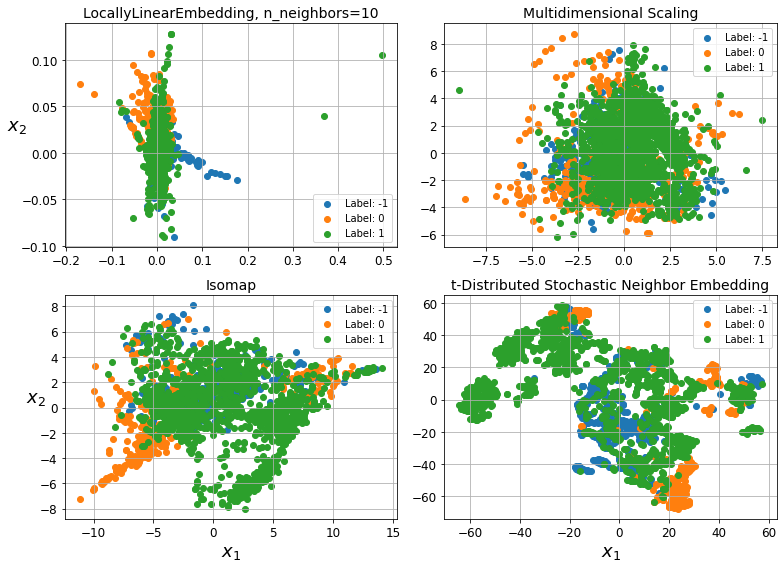

In [41]:
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE, MDS

# 四种常用的流形学习算法
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
mds = MDS(n_components=2, random_state=42)
isomap = Isomap(n_components=2)
tsne = TSNE(n_components=2, random_state=42)

model_manifold = [(221, lle, "LocallyLinearEmbedding, n_neighbors=10"), 
                  (222, mds, "Multidimensional Scaling"),
                  (223, isomap, "Isomap"), 
                  (224, tsne, "t-Distributed Stochastic Neighbor Embedding")]

plot_2D_reduced(model_manifold, X_processed, labels, tag, fig_name="manifold_plot")